# Clustering

## Data preparation 

In [1]:
from sklearn import datasets
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn import decomposition

/Users/izzysouthon/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Set random seed for reproducibility
np.random.seed(231)

# Generate the dataset
X, y = make_blobs(n_samples=300, n_features=4, centers=3)

display(X.shape)

(300, 4)

## (a) 

In [3]:
kmeans2 = KMeans(n_clusters=2, init='random', random_state=231).fit(X)
print(silhouette_score(X, kmeans2.labels_))

kmeans3 = KMeans(n_clusters=3, init='random', random_state=231).fit(X)
print(silhouette_score(X, kmeans3.labels_))

kmeans4 = KMeans(n_clusters=4, init='random', random_state=231).fit(X)
print(silhouette_score(X, kmeans4.labels_))

kmeans5 = KMeans(n_clusters=5, init='random', random_state=231).fit(X)
print(silhouette_score(X, kmeans5.labels_))

0.6515279371492653
0.838307214726647
0.6335381476038574
0.42206837621434257


## (b)

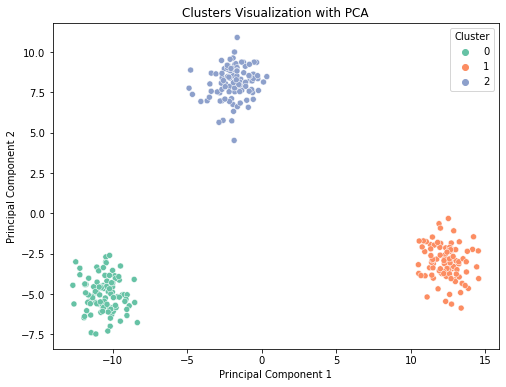

In [4]:
# Fit PCA to the dataset and transform it
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)



# Fit K-means clustering with the best K value
best_k = 3  
kmeans = KMeans(n_clusters=best_k, random_state=231)
cluster_labels = kmeans.fit_predict(X)

# Create a scatter plot of the data points using the first two principal components
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=cluster_labels, palette='Set2', legend='full')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters Visualization with PCA')
plt.legend(title='Cluster')
plt.show()

## (c)

In [5]:
from sklearn.cluster import AgglomerativeClustering

In [6]:
# Function for dendrogram
from scipy.cluster.hierarchy import dendrogram
import numpy as np
import matplotlib.pyplot as plt

def plot_dendrogram(model, **kwargs): 
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

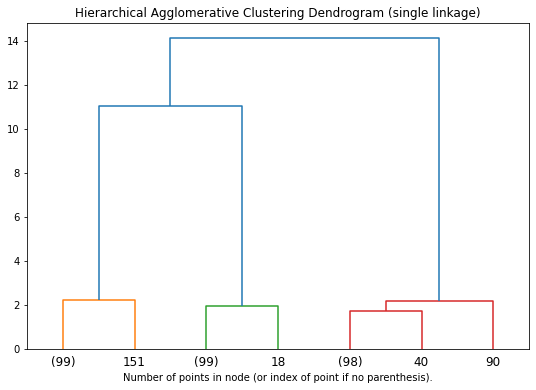

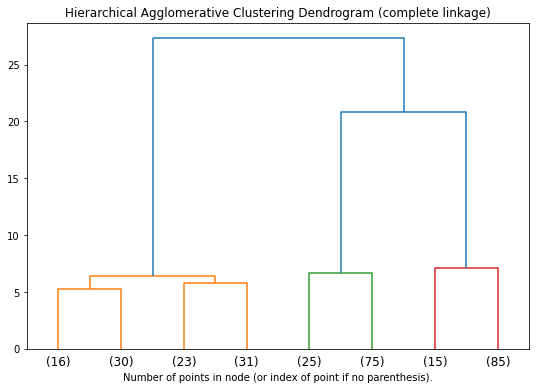

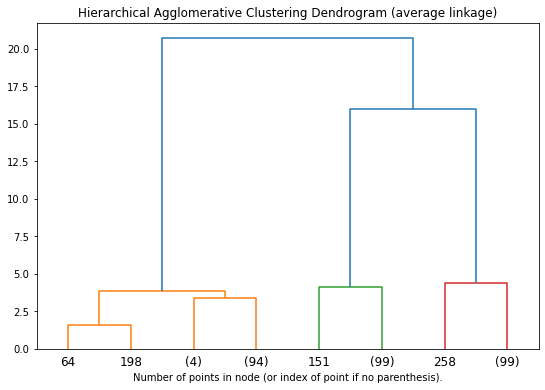

In [7]:
linkage_methods = ['single','complete','average']

for method in linkage_methods:
    agg_clusters = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage=method).fit(X)
    plt.figure(figsize=(9,6))
    plt.title(f"Hierarchical Agglomerative Clustering Dendrogram ({method} linkage)")
    plot_dendrogram(agg_clusters, truncate_mode="level", p=2)
    plt.xlabel("Number of points in node (or index of point if no parenthesis).")
    plt.show()